In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd  
import seaborn as sns

In [ ]:
data=pd.read_excel('/content/drive/My Drive/Online Retail.xlsx')

In [ ]:
data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
data[data.Description.isna()].head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom


In [ ]:
data[data.isnull().any(axis=1)].tail(150)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541391,581498,22161,HEART DECORATION RUSTIC HANGING,2,2011-12-09 10:26:00,1.63,NaN,United Kingdom
541392,581498,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,3,2011-12-09 10:26:00,5.79,NaN,United Kingdom
541393,581498,22174,PHOTO CUBE,3,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541394,581498,22175,PINK OWL SOFT TOY,1,2011-12-09 10:26:00,5.79,NaN,United Kingdom
541395,581498,22178,VICTORIAN GLASS HANGING T-LIGHT,1,2011-12-09 10:26:00,2.46,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
missing_percentage= data.isnull().sum() / data.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [ ]:
data[data.Description.isnull()].CustomerID.isnull().value_counts()

True    1454
Name: CustomerID, dtype: int64

In [ ]:
data[data.Description.isnull()].UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

In [ ]:
data.loc[data.CustomerID.isnull(), ["UnitPrice", "Quantity"]].describe()

,UnitPrice,Quantity
count,135080.000000,135080.000000
mean,8.076577,1.995573
std,151.900816,66.696153
min,-11062.060000,-9600.000000
25%,1.630000,1.000000
50%,3.290000,1.000000
75%,5.450000,3.000000
max,17836.460000,5568.000000


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.shape

(406829, 8)

In [ ]:
data=data[['CustomerID','InvoiceNo','StockCode','Description','Quantity','UnitPrice','InvoiceDate','Country']]

In [ ]:
data[1965:1974]

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country
3105,18011.0,536597,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,1,0.85,2010-12-01 17:35:00,United Kingdom
3106,18011.0,536597,21221,SET/4 BADGES CUTE CREATURES,5,1.25,2010-12-01 17:35:00,United Kingdom
3107,18011.0,536597,20755,BLUE PAISLEY POCKET BOOK,6,0.85,2010-12-01 17:35:00,United Kingdom
3108,13090.0,536598,21421,PORCELAIN ROSE LARGE,12,1.25,2010-12-02 07:48:00,United Kingdom
3109,13090.0,536598,21422,PORCELAIN ROSE SMALL,16,0.85,2010-12-02 07:48:00,United Kingdom
3110,13090.0,536598,22178,VICTORIAN GLASS HANGING T-LIGHT,24,1.25,2010-12-02 07:48:00,United Kingdom
3111,13090.0,536598,22617,BAKING SET SPACEBOY DESIGN,24,4.25,2010-12-02 07:48:00,United Kingdom
3112,15694.0,536599,22968,ROSE COTTAGE KEEPSAKE BOX,8,8.50,2010-12-02 07:49:00,United Kingdom
3113,15694.0,536599,22727,ALARM CLOCK BAKELIKE RED,4,3.75,2010-12-02 07:49:00,United Kingdom


In [ ]:
len(data['InvoiceNo'].unique())

22190

In [ ]:
data[data['Quantity']<0]

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country
141,14527.0,C536379,D,Discount,-1,27.50,2010-12-01 09:41:00,United Kingdom
154,15311.0,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,2010-12-01 09:49:00,United Kingdom
235,17548.0,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,2010-12-01 10:24:00,United Kingdom
236,17548.0,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,2010-12-01 10:24:00,United Kingdom
237,17548.0,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,2010-12-01 10:24:00,United Kingdom
...,...,...,...,...,...,...,...,...
540449,14397.0,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,2011-12-09 09:57:00,United Kingdom
541541,15498.0,C581499,M,Manual,-1,224.69,2011-12-09 10:28:00,United Kingdom
541715,15311.0,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,2011-12-09 11:57:00,United Kingdom
541716,17315.0,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,2011-12-09 11:58:00,United Kingdom


In [ ]:
len(data[data['Quantity']<0])

8905

In [ ]:
cancelled_products=data[data['Quantity']<0]

In [ ]:
cancelled_products

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country
141,14527.0,C536379,D,Discount,-1,27.50,2010-12-01 09:41:00,United Kingdom
154,15311.0,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,2010-12-01 09:49:00,United Kingdom
235,17548.0,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,2010-12-01 10:24:00,United Kingdom
236,17548.0,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,2010-12-01 10:24:00,United Kingdom
237,17548.0,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,2010-12-01 10:24:00,United Kingdom
...,...,...,...,...,...,...,...,...
540449,14397.0,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,2011-12-09 09:57:00,United Kingdom
541541,15498.0,C581499,M,Manual,-1,224.69,2011-12-09 10:28:00,United Kingdom
541715,15311.0,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,2011-12-09 11:57:00,United Kingdom
541716,17315.0,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,2011-12-09 11:58:00,United Kingdom


In [ ]:
data=data[data.Quantity>0]

In [ ]:
data.shape

(397924, 8)

In [ ]:
Total_Amount=data['Quantity']*data['UnitPrice']
data.insert(loc=6,column='Total_Amount',value=Total_Amount)

In [ ]:
data.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Total_Amount,InvoiceDate,Country
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom


In [ ]:
data[data['Total_Amount']<0]

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Total_Amount,InvoiceDate,Country


In [ ]:
data['year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Total_Amount,InvoiceDate,Country,year
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010


In [ ]:
revenue=data.groupby('year')['Total_Amount'].sum()
print(revenue)

year
2010    5.727139e+05
2011    8.338694e+06
Name: Total_Amount, dtype: float64


Text(0, 0.5, 'revenue generated')

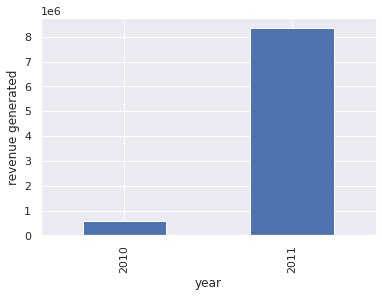

In [ ]:
plt=revenue.plot(kind='bar')
plt.set_xlabel('year')
plt.set_ylabel('revenue generated')

In [ ]:
data['month']=pd.DatetimeIndex(data['InvoiceDate']).month
data['month_name']=pd.DatetimeIndex(data['InvoiceDate']).month_name()
data.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Total_Amount,InvoiceDate,Country,year,month,month_name
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December


In [ ]:
print(data.groupby(['month','year'])['Total_Amount'].sum())

month  year
1      2011     569445.040
2      2011     447137.350
3      2011     595500.760
4      2011     469200.361
5      2011     678594.560
6      2011     661213.690
7      2011     600091.011
8      2011     645343.900
9      2011     952838.382
10     2011    1039318.790
11     2011    1161817.380
12     2010     572713.890
       2011     518192.790
Name: Total_Amount, dtype: float64


In [ ]:
data.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Total_Amount,InvoiceDate,Country,year,month,month_name
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December


Text(0, 0.5, 'Amount generated')

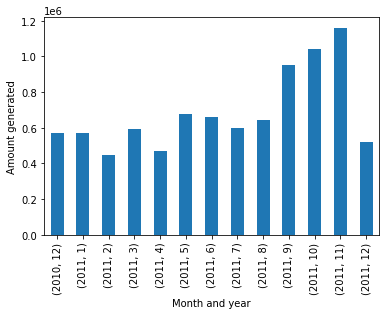

In [ ]:
plt=data.groupby(['year','month'])['Total_Amount'].sum().plot(kind='bar')
plt.set_xlabel('Month and year')
plt.set_ylabel('Amount generated')

In [ ]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
len(data['Country'].unique())

37

Text(0, 0.5, 'Count')

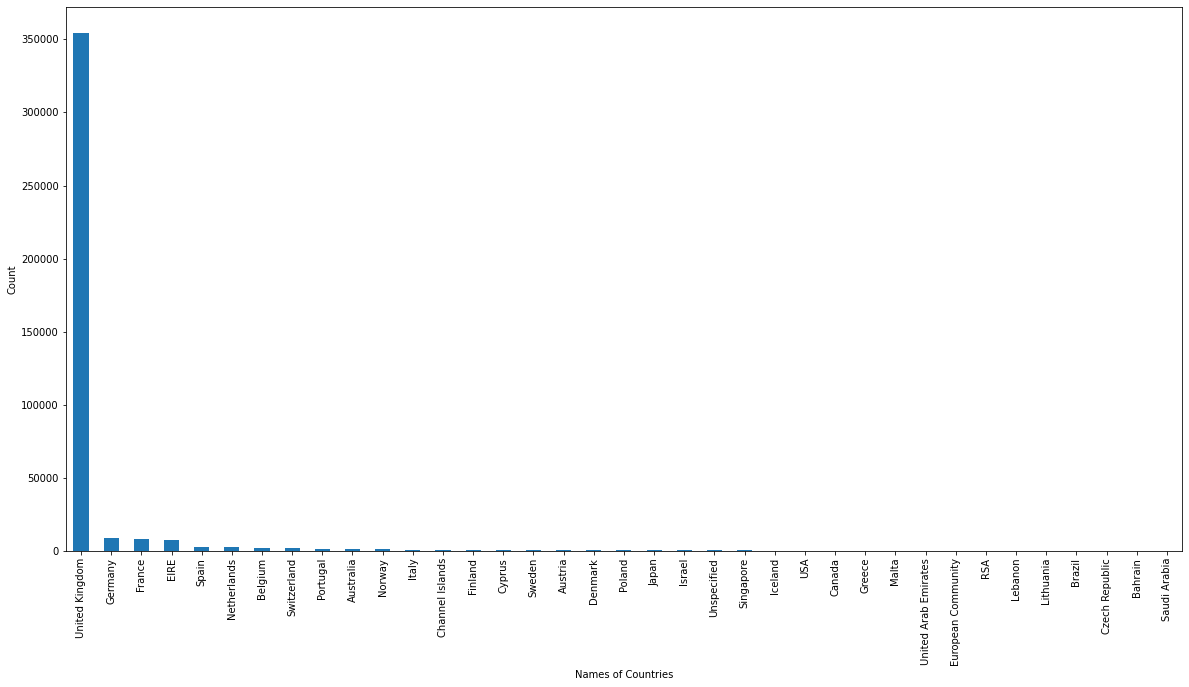

In [ ]:
plt=data['Country'].value_counts().plot.bar(figsize = (20, 10))
plt.set_xlabel('Names of Countries')
plt.set_ylabel('Count')

In [ ]:
country_revenue=data.groupby('Country')['Total_Amount'].sum().sort_values(ascending = False)
print(country_revenue)

Country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

Text(0, 0.5, 'Revenue generated')

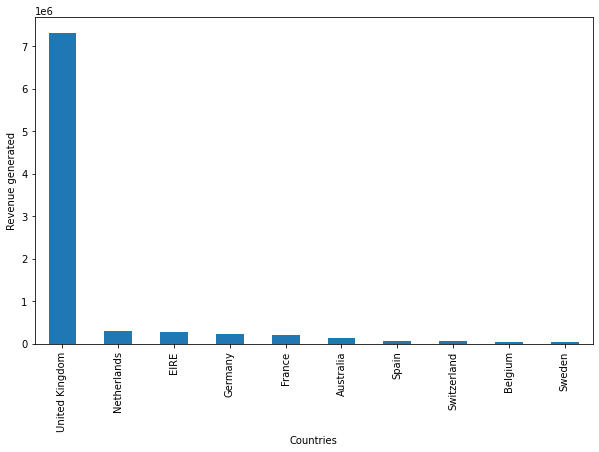

In [ ]:
plt=country_revenue[:10].plot.bar(figsize=(10,6))
plt.set_xlabel('Countries')
plt.set_ylabel('Revenue generated')

In [ ]:
quantity_ordered=data.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
print(quantity_ordered)

Country
United Kingdom          4269472
Netherlands              200937
EIRE                     140525
Germany                  119263
France                   111472
Australia                 84209
Sweden                    36083
Switzerland               30083
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16122
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Israel                     4046
Poland                     3684
Canada                     2763
Iceland                    2458
USA                        2458
Unspecified                1789
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671
Lithuania                   652


Text(0, 0.5, 'quantity_ordered')

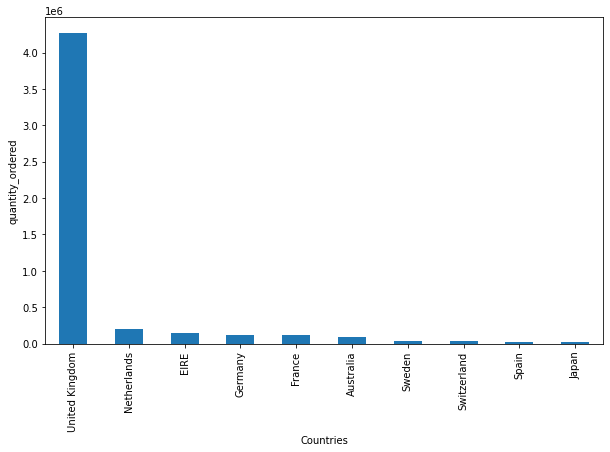

In [ ]:
plt=quantity_ordered[:10].plot.bar(figsize=(10,6))
plt.set_xlabel('Countries')
plt.set_ylabel('quantity_ordered')

In [ ]:
Noofcustomer=data.groupby('Country')['CustomerID'].count().sort_values(ascending = False)
print(Noofcustomer)

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


Text(0, 0.5, 'Noofcustomer')

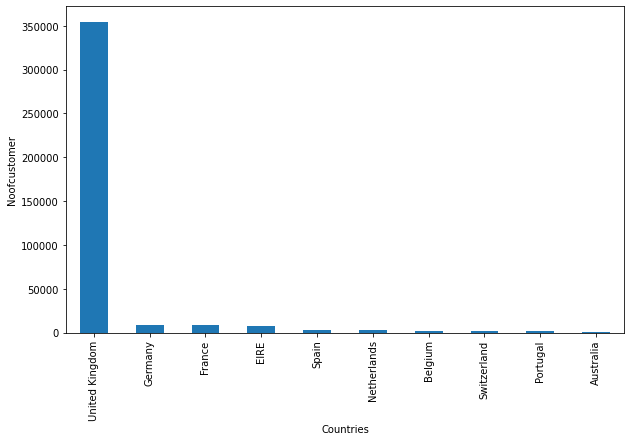

In [ ]:
plt=Noofcustomer[:10].plot.bar(figsize=(10,6))
plt.set_xlabel('Countries')
plt.set_ylabel('Noofcustomer')

In [ ]:
data['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
product_count=data['Description'].value_counts()

In [ ]:
product_count

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
                                      ... 
ENAMEL MUG PANTRY                        1
HEN HOUSE W CHICK IN NEST                1
PINK CHRISTMAS FLOCK DROPLET             1
SCALLOP SHELL SOAP DISH                  1
GLASS AND BEADS BRACELET IVORY           1
Name: Description, Length: 3877, dtype: int64

Text(0, 0.5, 'count')

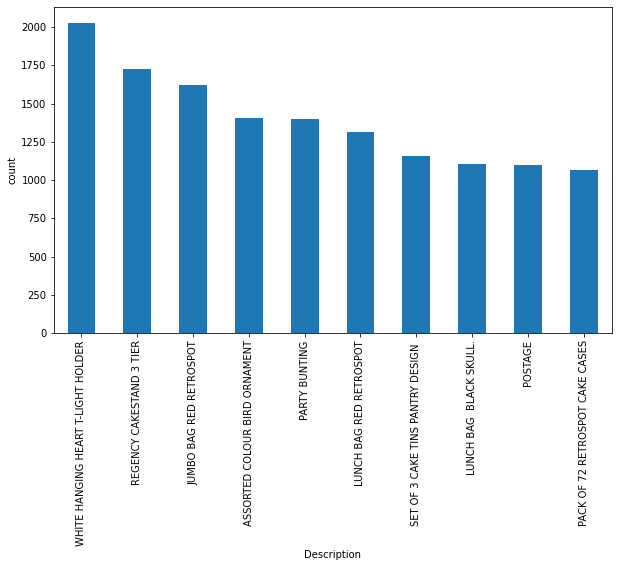

In [ ]:
plt=product_count[:10].plot.bar(figsize=(10,6))
plt.set_xlabel('Description')
plt.set_ylabel('count')

In [ ]:
highquant_product=data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(highquant_product)

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
JUMBO BAG RED RETROSPOT                46181
WHITE HANGING HEART T-LIGHT HOLDER     36725
                                       ...  
SET/3 TALL GLASS CANDLE HOLDER PINK        1
LASER CUT MULTI STRAND NECKLACE            1
CRACKED GLAZE EARRINGS BROWN               1
DOLPHIN WINDMILL                           1
SET OF 3 PINK FLYING DUCKS                 1
Name: Quantity, Length: 3877, dtype: int64


Text(0, 0.5, 'quantity')

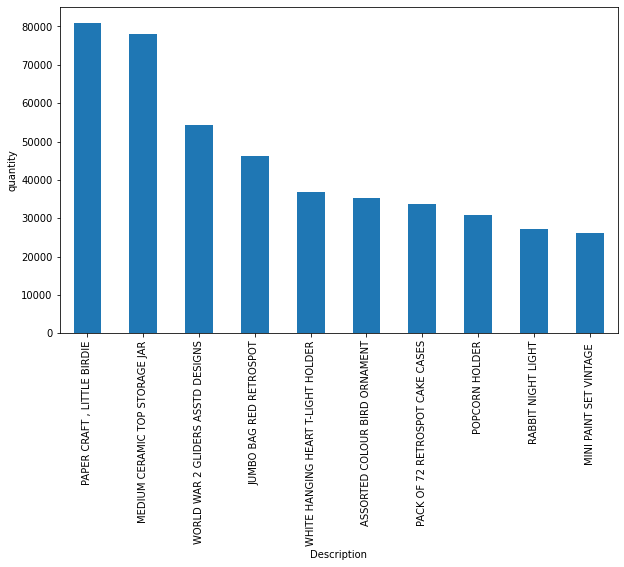

In [ ]:
plt=highquant_product[:10].plot.bar(figsize=(10,6))
plt.set_xlabel('Description')
plt.set_ylabel('quantity')

In [ ]:
highprice_product=data.groupby('Description')['UnitPrice'].sum().sort_values(ascending=False)
print(highprice_product)

Description
Manual                              49782.810
POSTAGE                             34695.960
REGENCY CAKESTAND 3 TIER            21508.900
DOTCOM POSTAGE                      11906.360
PARTY BUNTING                        6807.420
                                      ...    
POP ART PUSH DOWN RUBBER                0.240
CAT WITH SUNGLASSES BLANK CARD          0.190
HAPPY BIRTHDAY CARD TEDDY/CAKE          0.190
PINK FLUFFY CHRISTMAS DECORATION        0.190
PADS TO MATCH ALL CUSHIONS              0.003
Name: UnitPrice, Length: 3877, dtype: float64


In [ ]:
highestAmount_customer=data.groupby(['CustomerID','Country'])['Total_Amount'].sum().sort_values(ascending=False)
highestAmount_customer[:5]

CustomerID  Country       
14646.0     Netherlands       280206.02
18102.0     United Kingdom    259657.30
17450.0     United Kingdom    194550.79
16446.0     United Kingdom    168472.50
14911.0     EIRE              143825.06
Name: Total_Amount, dtype: float64

In [ ]:
data['day']=pd.DatetimeIndex(data['InvoiceDate']).day
data['day_name']=pd.DatetimeIndex(data['InvoiceDate']).day_name()
data.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Total_Amount,InvoiceDate,Country,year,month,month_name,day,day_name
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday


In [ ]:
data.groupby(['day_name'])['Total_Amount'].sum().sort_values(ascending=False)

day_name
Thursday     1976859.070
Tuesday      1700634.631
Wednesday    1588336.170
Friday       1485917.401
Monday       1367146.411
Sunday        792514.221
Name: Total_Amount, dtype: float64

In [ ]:
quant_eachday=data.groupby('InvoiceNo')['day_name'].unique().value_counts()

In [ ]:
quant_eachday

[Thursday]     4033
[Wednesday]    3455
[Tuesday]      3185
[Monday]       2863
[Friday]       2831
[Sunday]       2169
Name: day_name, dtype: int64

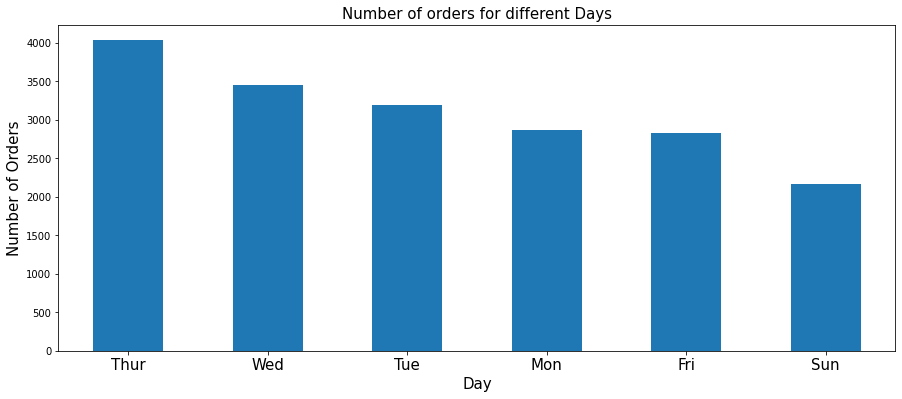

In [ ]:
ax=quant_eachday.plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Thur','Wed','Tue','Mon','Fri','Sun'),rotation='horizontal',fontsize=15);

In [ ]:
data['date']=pd.DatetimeIndex(data['InvoiceDate']).date

In [ ]:
data.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Total_Amount,InvoiceDate,Country,year,month,month_name,day,day_name,date
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday,2010-12-01
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday,2010-12-01
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday,2010-12-01
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday,2010-12-01
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday,2010-12-01


In [ ]:
data['Hour']=data.InvoiceDate.dt.hour

In [ ]:
min(data['Hour'])

6

In [ ]:
max(data['Hour'])

20

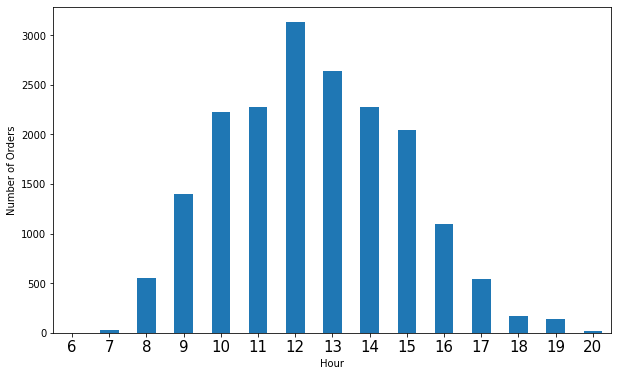

In [ ]:
ax=data.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(10,6))
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Orders')
ax.set_xticklabels(range(6,21),rotation='horizontal',fontsize=15);

cancelled  products

In [ ]:
Amount_lost=cancelled_products['Quantity']*cancelled_products['UnitPrice']
cancelled_products.insert(loc=6,column='Amount_lost',value=Amount_lost)

In [ ]:
cancelled_products['year'] = pd.DatetimeIndex(cancelled_products['InvoiceDate']).year
cancelled_products.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount_lost,InvoiceDate,Country,year
141,14527.0,C536379,D,Discount,-1,27.50,-27.50,2010-12-01 09:41:00,United Kingdom,2010
154,15311.0,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,-4.65,2010-12-01 09:49:00,United Kingdom,2010
235,17548.0,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,-19.80,2010-12-01 10:24:00,United Kingdom,2010
236,17548.0,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,-6.96,2010-12-01 10:24:00,United Kingdom,2010
237,17548.0,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,-6.96,2010-12-01 10:24:00,United Kingdom,2010


In [ ]:
revenue_lost=cancelled_products.groupby('year')['Amount_lost'].sum()
print(revenue_lost)

year
2010    -18109.87
2011   -593232.22
Name: Amount_lost, dtype: float64


Text(0, 0.5, 'revenue lost')

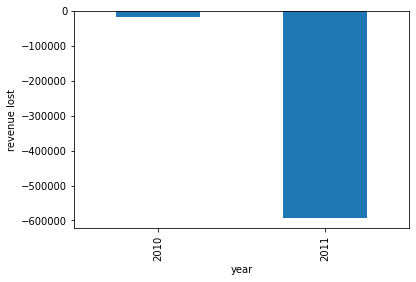

In [ ]:
plt=revenue_lost.plot(kind='bar')
plt.set_xlabel('year')
plt.set_ylabel('revenue lost')

In [ ]:
cancelled_products['month']=pd.DatetimeIndex(cancelled_products['InvoiceDate']).month
cancelled_products['month_name']=pd.DatetimeIndex(cancelled_products['InvoiceDate']).month_name()
cancelled_products.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount_lost,InvoiceDate,Country,year,month,month_name
141,14527.0,C536379,D,Discount,-1,27.50,-27.50,2010-12-01 09:41:00,United Kingdom,2010,12,December
154,15311.0,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,-4.65,2010-12-01 09:49:00,United Kingdom,2010,12,December
235,17548.0,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,-19.80,2010-12-01 10:24:00,United Kingdom,2010,12,December
236,17548.0,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,-6.96,2010-12-01 10:24:00,United Kingdom,2010,12,December
237,17548.0,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,-6.96,2010-12-01 10:24:00,United Kingdom,2010,12,December


In [ ]:
print(cancelled_products.groupby(['month','year'])['Amount_lost'].sum())

month  year
1      2011    -94370.66
2      2011    -10591.20
3      2011    -15536.15
4      2011    -43152.51
5      2011    -30343.48
6      2011    -53200.53
7      2011    -25852.53
8      2011    -28975.90
9      2011    -21398.01
10     2011    -64715.20
11     2011    -29409.64
12     2010    -18109.87
       2011   -175686.41
Name: Amount_lost, dtype: float64


Text(0, 0.5, 'Amount lost')

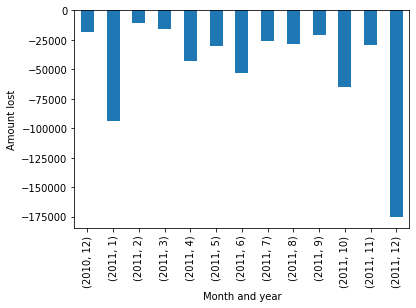

In [ ]:
plt=cancelled_products.groupby(['year','month'])['Amount_lost'].sum().plot(kind='bar')
plt.set_xlabel('Month and year')
plt.set_ylabel('Amount lost')

Text(0, 0.5, 'Count')

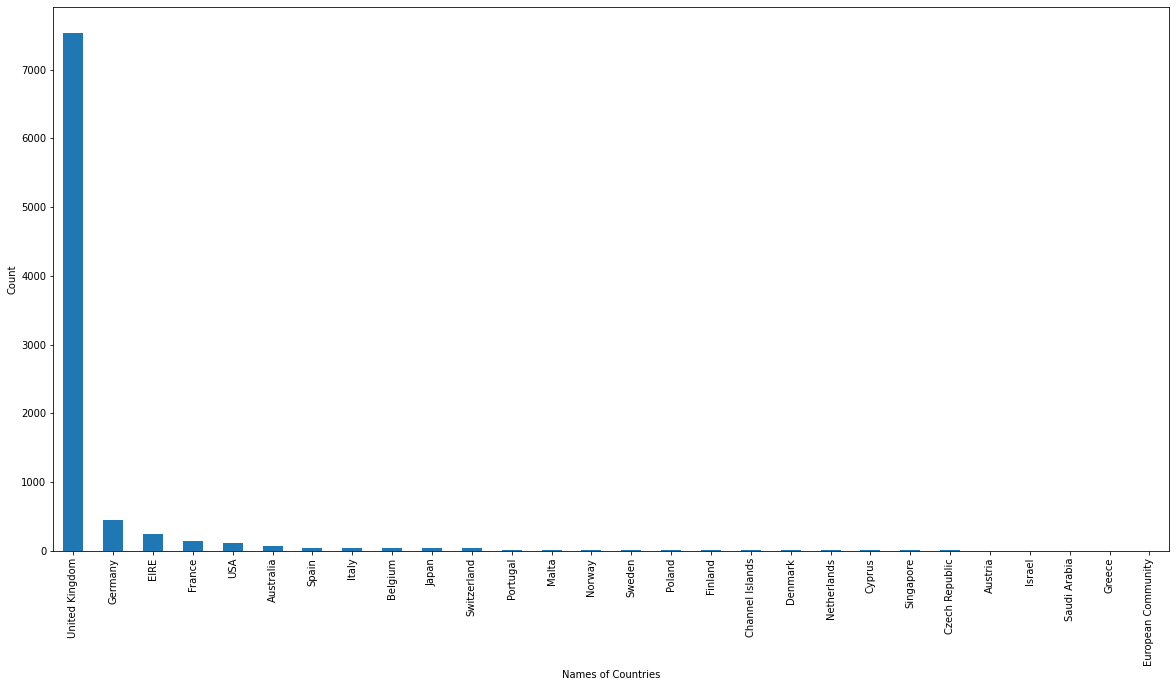

In [ ]:
plt=cancelled_products['Country'].value_counts().plot.bar(figsize = (20, 10))
plt.set_xlabel('Names of Countries')
plt.set_ylabel('Count')

In [ ]:
country_revenuelost=cancelled_products.groupby('Country')['Amount_lost'].sum().sort_values(ascending = False)
print(country_revenuelost)

Country
European Community        -8.50
Saudi Arabia             -14.75
Austria                  -44.36
Greece                   -50.00
Czech Republic          -119.02
Poland                  -121.51
Denmark                 -187.20
Finland                 -219.34
Malta                   -220.12
Israel                  -227.44
Belgium                 -285.38
Channel Islands         -364.15
Italy                   -592.73
Cyprus                  -644.09
Switzerland             -704.55
Netherlands             -784.80
Norway                 -1001.98
Australia              -1444.04
Sweden                 -1782.42
USA                    -1849.47
Japan                  -2075.75
Portugal               -4380.08
Spain                  -6802.53
Germany                -7168.93
Singapore             -12158.90
France                -12311.21
EIRE                  -15260.68
United Kingdom       -540518.16
Name: Amount_lost, dtype: float64


Text(0, 0.5, 'Revenue lost')

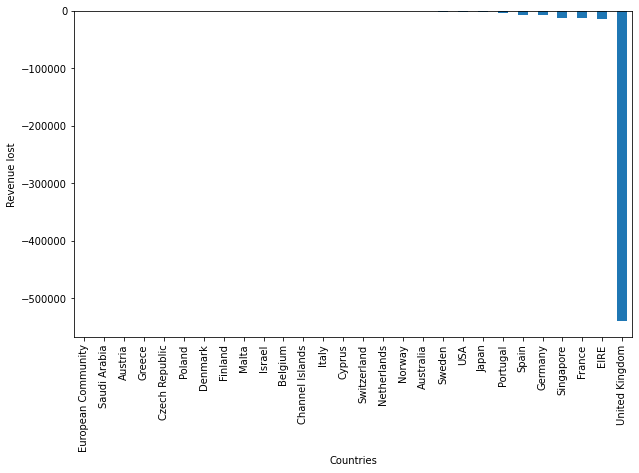

In [ ]:
plt=country_revenuelost.plot.bar(figsize=(10,6))
plt.set_xlabel('Countries')
plt.set_ylabel('Revenue lost')

In [ ]:
quantity_cancelled=cancelled_products.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
print(quantity_cancelled)

Country
Greece                    -1
European Community        -2
Saudi Arabia              -5
Singapore                 -7
Channel Islands          -12
Malta                    -26
Poland                   -31
Finland                  -38
Cyprus                   -44
Denmark                  -47
Austria                  -54
Israel                   -56
Portugal                 -78
Czech Republic           -79
Belgium                  -85
Norway                   -91
Italy                   -113
Switzerland             -305
Sweden                  -446
Australia               -556
Japan                   -798
Netherlands             -809
Spain                  -1127
USA                    -1424
France                 -1624
Germany                -1815
EIRE                   -4196
United Kingdom       -260939
Name: Quantity, dtype: int64


Text(0, 0.5, 'quantity_cancelled')

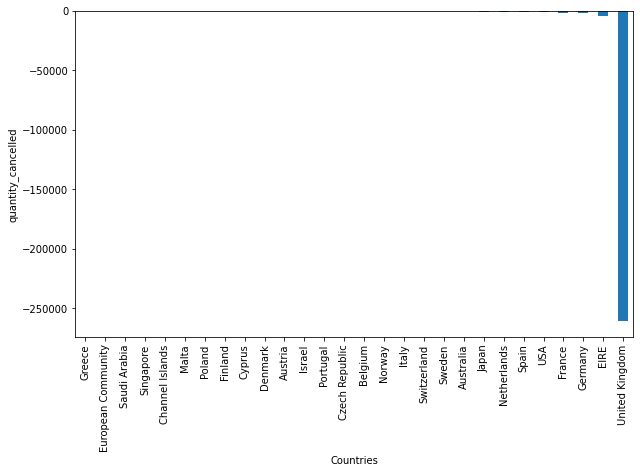

In [ ]:
plt=quantity_cancelled.plot.bar(figsize=(10,6))
plt.set_xlabel('Countries')
plt.set_ylabel('quantity_cancelled')

In [ ]:
Noofcustomer_cancellations=cancelled_products.groupby('Country')['CustomerID'].count().sort_values(ascending = False)
print(Noofcustomer_cancellations)

Country
United Kingdom        7533
Germany                453
EIRE                   247
France                 149
USA                    112
Australia               74
Spain                   48
Italy                   45
Belgium                 38
Japan                   37
Switzerland             35
Portugal                18
Malta                   15
Norway                  14
Sweden                  11
Poland                  11
Channel Islands         10
Finland                 10
Denmark                  9
Cyprus                   8
Netherlands              8
Singapore                7
Czech Republic           5
Austria                  3
Israel                   2
European Community       1
Greece                   1
Saudi Arabia             1
Name: CustomerID, dtype: int64


Text(0, 0.5, 'Noofcustomer_cancellations')

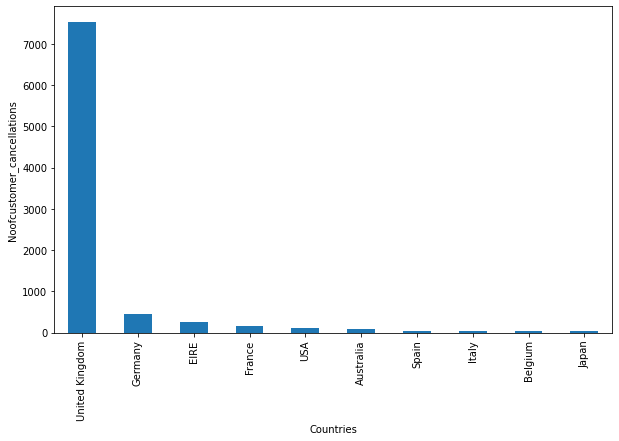

In [ ]:
plt=Noofcustomer_cancellations[:10].plot.bar(figsize=(10,6))
plt.set_xlabel('Countries')
plt.set_ylabel('Noofcustomer_cancellations')

In [ ]:
cancelled_products['Description'].unique()

array(['Discount', 'SET OF 3 COLOURED  FLYING DUCKS',
       'PLASTERS IN TIN CIRCUS PARADE ', ...,
       'SMALL SQUARE CUT GLASS CANDLESTICK',
       'HOUSE SHAPE PENCIL SHARPENER', 'PAPER CRAFT , LITTLE BIRDIE'],
      dtype=object)

In [ ]:
cancelledproducts_count=cancelled_products['Description'].value_counts()

In [ ]:
cancelledproducts_count

REGENCY CAKESTAND 3 TIER            181
Manual                              175
POSTAGE                              97
JAM MAKING SET WITH JARS             86
Discount                             77
                                   ... 
MAGIC DRAWING SLATE PURDEY            1
BLUE WIRE SPIRAL CANDLE HOLDER        1
FRENCH GARDEN SIGN BLUE METAL         1
SET OF 6 T-LIGHTS EASTER CHICKS       1
AMBER DROP EARRINGS W LONG BEADS      1
Name: Description, Length: 1945, dtype: int64

Text(0, 0.5, 'count_cancelled')

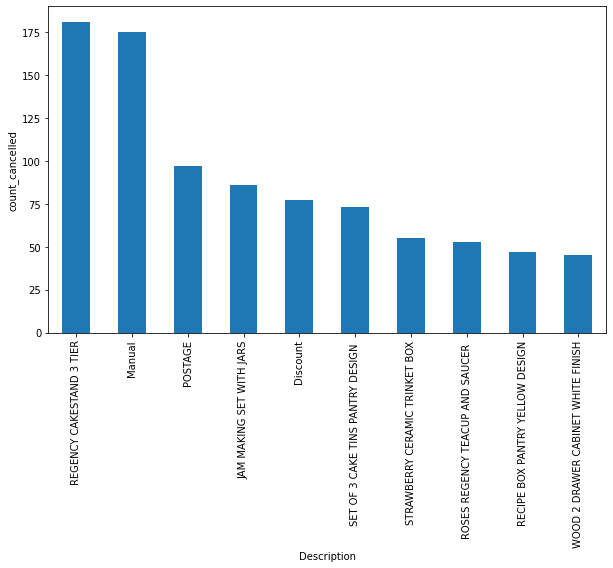

In [ ]:
plt=cancelledproducts_count[:10].plot.bar(figsize=(10,6))
plt.set_xlabel('Description')
plt.set_ylabel('count_cancelled')

In [ ]:
highquant_cancelledproduct=cancelled_products.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(highquant_cancelledproduct)

Description
FUNKY WASHING UP GLOVES ASSORTED          -1
BLACK HEART CARD HOLDER                   -1
RECYCLED ACAPULCO MAT PINK                -1
RECYCLED ACAPULCO MAT TURQUOISE           -1
BLACK BAROQUE WALL CLOCK                  -1
                                       ...  
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
Manual                                 -3995
ROTATING SILVER ANGELS T-LIGHT HLDR    -9367
MEDIUM CERAMIC TOP STORAGE JAR        -74494
PAPER CRAFT , LITTLE BIRDIE           -80995
Name: Quantity, Length: 1945, dtype: int64


In [ ]:
plt=highquant_cancelledproduct[10:].plot.bar(figsize=(10,50))
plt.set_ylabel('Description')
plt.set_xlabel('quantity_cancelled')

In [ ]:
highprice_cancelledproduct=cancelled_products.groupby('Description')['UnitPrice'].sum().sort_values(ascending=False)
print(highprice_cancelledproduct)

Description
Manual                               105725.11
POSTAGE                               10618.72
CRUK Commission                        7933.43
Discount                               5581.31
REGENCY CAKESTAND 3 TIER               2169.15
                                       ...    
WINE BOTTLE DRESSING DARK BLUE            0.12
HANGING WOOD AND FELT FLOWER              0.12
POPART RECT PENCIL SHARPENER ASST         0.12
PIECE OF CAMO STATIONERY SET              0.08
HOUSE SHAPE PENCIL SHARPENER              0.06
Name: UnitPrice, Length: 1945, dtype: float64


In [ ]:
highestAmount_cancelledcustomer=cancelled_products.groupby(['CustomerID','Country'])['Amount_lost'].sum().sort_values(ascending=False)
highestAmount_cancelledcustomer

CustomerID  Country       
15903.0     United Kingdom        -0.42
17334.0     United Kingdom        -0.42
16566.0     United Kingdom        -0.65
12421.0     Spain                 -0.77
17164.0     United Kingdom        -0.95
                                ...    
15749.0     United Kingdom    -22998.40
16029.0     United Kingdom    -30032.23
15098.0     United Kingdom    -39267.00
12346.0     United Kingdom    -77183.60
16446.0     United Kingdom   -168469.60
Name: Amount_lost, Length: 1590, dtype: float64

In [ ]:
cancelled_products['day']=pd.DatetimeIndex(cancelled_products['InvoiceDate']).day
cancelled_products['day_name']=pd.DatetimeIndex(cancelled_products['InvoiceDate']).day_name()
cancelled_products.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount_lost,InvoiceDate,Country,year,month,month_name,day,day_name
141,14527.0,C536379,D,Discount,-1,27.50,-27.50,2010-12-01 09:41:00,United Kingdom,2010,12,December,1,Wednesday
154,15311.0,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,-4.65,2010-12-01 09:49:00,United Kingdom,2010,12,December,1,Wednesday
235,17548.0,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,-19.80,2010-12-01 10:24:00,United Kingdom,2010,12,December,1,Wednesday
236,17548.0,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,-6.96,2010-12-01 10:24:00,United Kingdom,2010,12,December,1,Wednesday
237,17548.0,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,-6.96,2010-12-01 10:24:00,United Kingdom,2010,12,December,1,Wednesday


In [ ]:
cancelled_products.groupby(['day_name'])['Amount_lost'].sum().sort_values(ascending=False)

day_name
Sunday        -8095.37
Wednesday    -57858.68
Thursday     -70750.88
Monday       -92594.90
Tuesday     -137441.04
Friday      -244601.22
Name: Amount_lost, dtype: float64

In [ ]:
quantcancelled_eachday=cancelled_products.groupby('InvoiceNo')['day_name'].unique().value_counts()

In [ ]:
quantcancelled_eachday

[Thursday]     945
[Tuesday]      707
[Wednesday]    655
[Monday]       649
[Friday]       525
[Sunday]       173
Name: day_name, dtype: int64

Text(0, 0.5, 'Number of Orders cancelled')

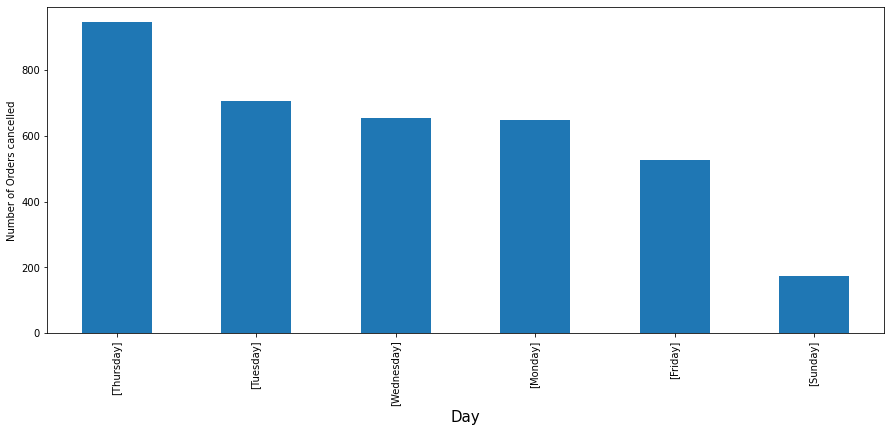

In [ ]:
ax=quantcancelled_eachday.plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders cancelled')

In [ ]:
cancelled_products['date']=pd.DatetimeIndex(cancelled_products['InvoiceDate']).date

In [ ]:
cancelled_products['Hour']=cancelled_products.InvoiceDate.dt.hour

In [ ]:
min(cancelled_products['Hour'])

6

In [ ]:
max(cancelled_products['Hour'])

20

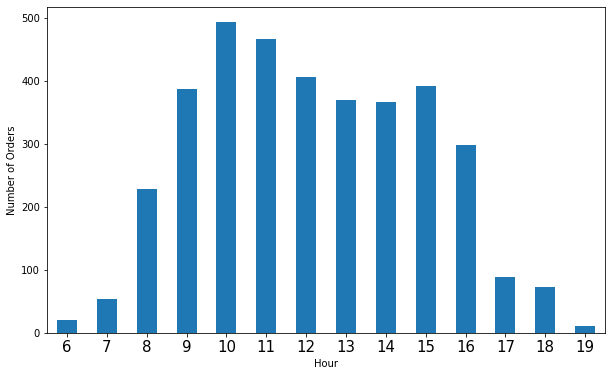

In [ ]:
ax=cancelled_products.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(10,6))
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Orders')
ax.set_xticklabels(range(6,21),rotation='horizontal',fontsize=15);

In [ ]:
data_new=data
data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data_Arima=data

In [ ]:
data_Arima

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Total_Amount,InvoiceDate,Country,year,month,month_name,day,day_name,date,Hour
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday,2010-12-01,8
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday,2010-12-01,8
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday,2010-12-01,8
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday,2010-12-01,8
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December,1,Wednesday,2010-12-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,12680.0,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,2011-12-09 12:50:00,France,2011,12,December,9,Friday,2011-12-09,12
541905,12680.0,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,2011-12-09 12:50:00,France,2011,12,December,9,Friday,2011-12-09,12
541906,12680.0,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,2011-12-09 12:50:00,France,2011,12,December,9,Friday,2011-12-09,12
541907,12680.0,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,2011-12-09 12:50:00,France,2011,12,December,9,Friday,2011-12-09,12


In [ ]:
data_new.shape

(397924, 16)

ARIMA

In [ ]:
data_Arima=data

In [ ]:
data_Arima[5000:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
7374,537034,22747,POPPY'S PLAYHOUSE BATHROOM,6,2010-12-03 17:20:00,2.10,13081.0,United Kingdom,2010-12-03
7375,537034,20676,RED RETROSPOT BOWL,8,2010-12-03 17:20:00,1.25,13081.0,United Kingdom,2010-12-03
7376,537034,21243,PINK POLKADOT PLATE,8,2010-12-03 17:20:00,1.69,13081.0,United Kingdom,2010-12-03
7377,537034,84997D,PINK 3 PIECE POLKADOT CUTLERY SET,6,2010-12-03 17:20:00,3.75,13081.0,United Kingdom,2010-12-03
7378,537034,22432,WATERING CAN PINK BUNNY,6,2010-12-03 17:20:00,1.95,13081.0,United Kingdom,2010-12-03
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09


In [ ]:
data_arima = data_Arima.groupby('date').Quantity.sum().reset_index()

In [ ]:
data_arima

,date,Quantity
0,2010-12-01,24215
1,2010-12-02,31142
2,2010-12-03,11839
3,2010-12-05,16450
4,2010-12-06,16291
...,...,...
300,2011-12-05,38428
301,2011-12-06,27827
302,2011-12-07,41102
303,2011-12-08,27551


In [ ]:
data_arima['date']=pd.to_datetime(data_arima['date'])

In [ ]:
data_arima.set_index('date',inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data_arima.Quantity.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.274889
p-value: 0.640581


In [ ]:
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

	1%: -3.452
	5%: -2.871
	10%: -2.572


In [ ]:
data_arima['firstdifference']=data_arima.Quantity-data_arima.Quantity.shift(1)
result=adfuller(data_arima.firstdifference.dropna(inplace=False))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.035793
p-value: 0.000000
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [ ]:
data_arima

,Quantity,firstdifference
date,,
2010-12-01,24215,NaN
2010-12-02,31142,6927.0
2010-12-03,11839,-19303.0
2010-12-05,16450,4611.0
2010-12-06,16291,-159.0
...,...,...
2011-12-05,38428,26993.0
2011-12-06,27827,-10601.0
2011-12-07,41102,13275.0


In [ ]:
data_arima=data_arima.fillna(method='bfill')

In [ ]:
data_arima

,Quantity,firstdifference
date,,
2010-12-01,24215,6927.0
2010-12-02,31142,6927.0
2010-12-03,11839,-19303.0
2010-12-05,16450,4611.0
2010-12-06,16291,-159.0
...,...,...
2011-12-05,38428,26993.0
2011-12-06,27827,-10601.0
2011-12-07,41102,13275.0


In [ ]:
adfuller(data_arima.firstdifference.dropna(inplace=False))

(-17.077847346454906,
 7.744123846303265e-30,
 4,
 300,
 {'1%': -3.4523371197407404,
  '10%': -2.571929211111111,
  '5%': -2.871222860740741},
 6057.976024825801)

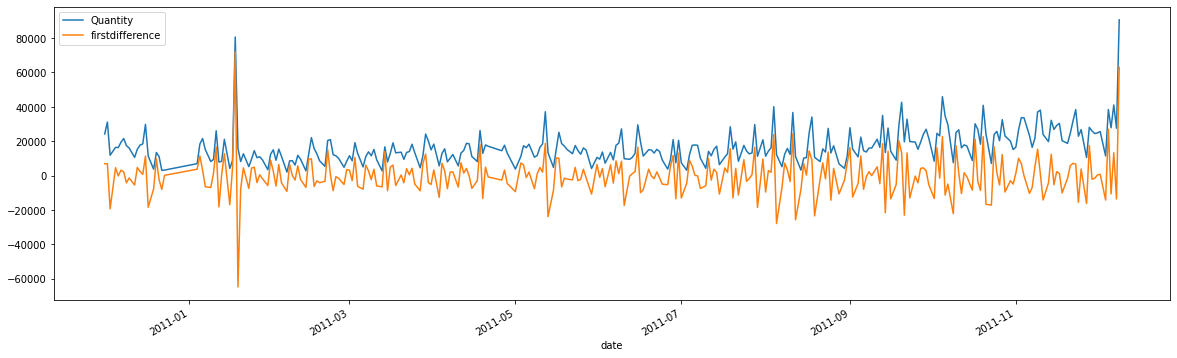

In [ ]:
data_arima.plot(figsize=(20,6))

In [ ]:
data_arima= data_arima['firstdifference'].resample('D').sum()

In [ ]:
data_arima=data_arima.replace(0).fillna(method='bfill')

In [ ]:
data_arima

date
2010-12-01     6927.0
2010-12-02     6927.0
2010-12-03   -19303.0
2010-12-04   -19303.0
2010-12-05     4611.0
               ...   
2011-12-05    26993.0
2011-12-06   -10601.0
2011-12-07    13275.0
2011-12-08   -13551.0
2011-12-09    63031.0
Freq: D, Name: firstdifference, Length: 374, dtype: float64

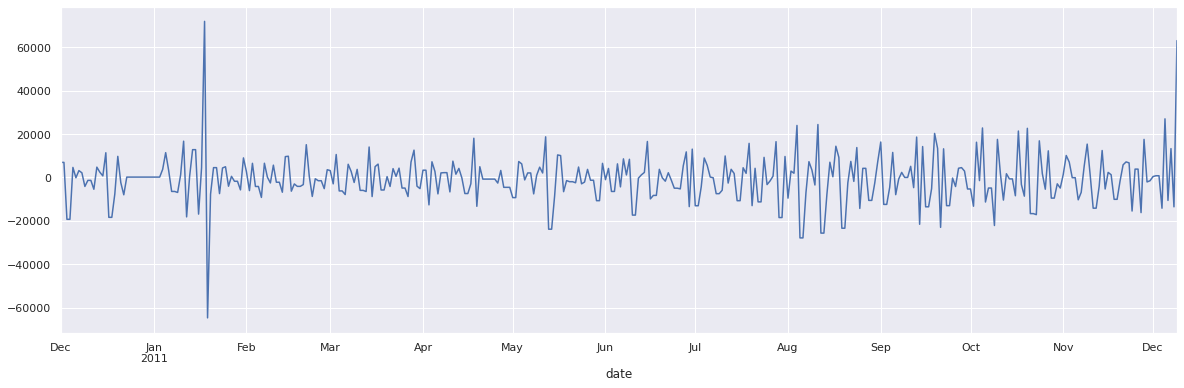

In [ ]:
data_arima.plot(figsize=(20,6))

In [ ]:
data_arima

date
2010-12-01     6927.0
2010-12-02     6927.0
2010-12-03   -19303.0
2010-12-04   -19303.0
2010-12-05     4611.0
               ...   
2011-12-05    26993.0
2011-12-06   -10601.0
2011-12-07    13275.0
2011-12-08   -13551.0
2011-12-09    63031.0
Freq: D, Name: firstdifference, Length: 374, dtype: float64

In [ ]:
import warnings
import itertools
import operator
import statsmodels.api as sm

In [ ]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [ ]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

s = 100
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(p, d, q))]

In [ ]:
warnings.filterwarnings('ignore')
history = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_arima,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            
            results = mod.fit()
            history[(param, param_seasonal)] = results.aic
            print('ARIMA{}x{} - AIC: {}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 100) - AIC: 8017.312317055526
ARIMA(0, 0, 0)x(0, 0, 1, 100) - AIC: 11237.242219581001
ARIMA(0, 0, 0)x(0, 1, 0, 100) - AIC: 6048.556765034769
ARIMA(0, 0, 0)x(1, 0, 0, 100) - AIC: 5874.705063133271
ARIMA(0, 0, 0)x(1, 0, 1, 100) - AIC: 8369.14303528866
ARIMA(0, 0, 0)x(1, 1, 0, 100) - AIC: 3842.6552235035037
ARIMA(0, 0, 1)x(0, 0, 0, 100) - AIC: 7974.320269766627
ARIMA(0, 0, 1)x(0, 0, 1, 100) - AIC: 35293.146647748435
ARIMA(0, 0, 1)x(0, 1, 0, 100) - AIC: 6021.7829784767555
ARIMA(0, 0, 1)x(1, 0, 0, 100) - AIC: 5868.040052270895
ARIMA(0, 0, 1)x(1, 0, 1, 100) - AIC: 35361.82663426755
ARIMA(0, 0, 1)x(1, 1, 0, 100) - AIC: 3842.8268670712664
ARIMA(0, 1, 0)x(0, 0, 0, 100) - AIC: 8301.306479932458
ARIMA(0, 1, 0)x(0, 0, 1, 100) - AIC: 11849.35278144248
ARIMA(0, 1, 0)x(0, 1, 0, 100) - AIC: 6234.148230768957
ARIMA(0, 1, 0)x(1, 0, 0, 100) - AIC: 6062.2828505044345
ARIMA(0, 1, 0)x(1, 0, 1, 100) - AIC: 14597.353625778329
ARIMA(0, 1, 0)x(1, 1, 0, 100) - AIC: 3945.6943536450317
ARI

In [ ]:
sorted_x = sorted(history.items(), key=operator.itemgetter(1))

In [ ]:
param, param_seasonal =  sorted_x[0][0][0], sorted_x[0][0][1]

In [ ]:
print(param)
print(param_seasonal)

(1, 0, 1)
(1, 1, 0, 100)


In [ ]:
model = sm.tsa.statespace.SARIMAX(data_arima,
                         order = param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)

results = model.fit()

In [ ]:
print(results.summary())

                                  Statespace Model Results                                 
Dep. Variable:                     firstdifference   No. Observations:                  374
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 100)   Log Likelihood               -1899.704
Date:                             Tue, 28 Jul 2020   AIC                           3807.407
Time:                                     06:17:10   BIC                           3820.021
Sample:                                 12-01-2010   HQIC                          3812.525
                                      - 12-09-2011                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4580      0.161      2.851      0.004       0.143       0.773
ma.L1         -0.7767      

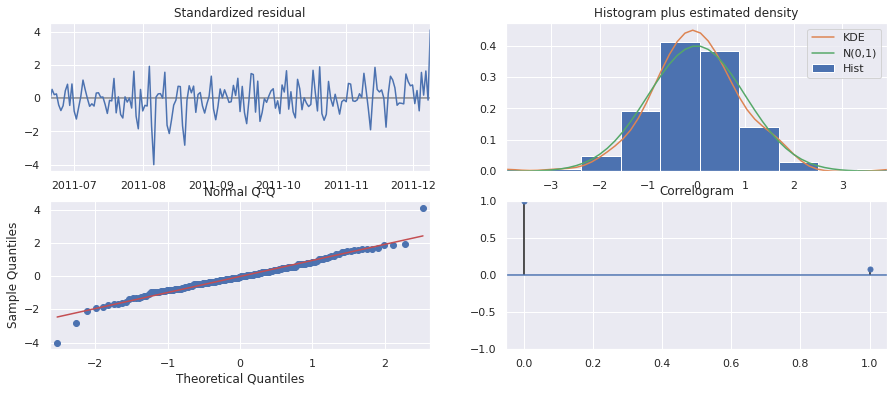

In [ ]:
results.plot_diagnostics(lags=1, figsize=(15,6))
plt.show()

In [ ]:
start_date = '2011-09-01'
pred = results.get_prediction(start=pd.to_datetime(start_date), dynamic=False)

In [ ]:
pred_ci = pred.conf_int()

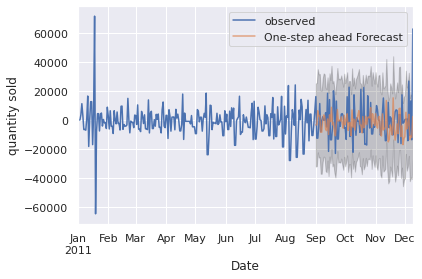

In [ ]:
ax = data_arima['2011':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k',
               alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('quantity sold')

plt.legend()

plt.show()

In [ ]:
from math import sqrt
y_forecasted = pred.predicted_mean
y_truth = data_arima[start_date:]

mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2))) 
print(sqrt(mse))

The Mean Squared Error of our forecasts is 194849401.15
13958.846698311861


In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime(start_date), dynamic=True)

pred_dynamic_ci = pred_dynamic.conf_int()

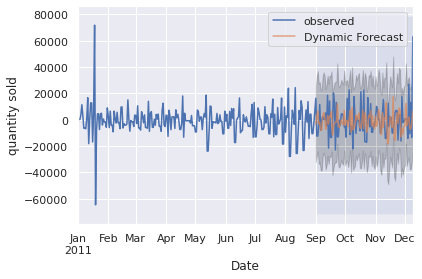

In [ ]:
ax = data_arima['2011':].plot(label='observed')

pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=.7)

ax.fill_between(pred_dynamic_ci.index,
               pred_dynamic_ci.iloc[:, 0],
               pred_dynamic_ci.iloc[:, 1], color='k',
               alpha=.2)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(start_date), data_arima.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('quantity sold')

plt.legend()

plt.show()

In [ ]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = data_arima[start_date:]
mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print(sqrt(mse))

The Mean Squared Error of our forecasts is 216218227.42
14704.360829893601


In [ ]:
pred_uc = results.get_forecast(steps=365)

pred_ci = pred_uc.conf_int()

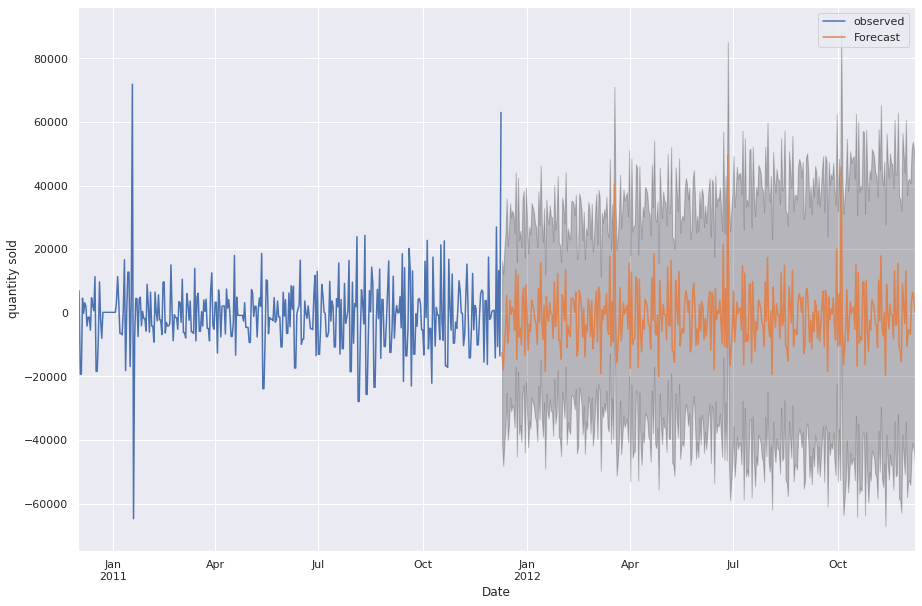

In [ ]:
ax = data_arima.plot(label='observed', figsize=(15,10))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1],
               color='k',
               alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('quantity sold')

plt.legend()
plt.show()

In [ ]:
data_Arima=data

In [ ]:
data_Arima.set_index('InvoiceDate', inplace=True)
data_arima= data_Arima['Quantity'].resample('D').sum()

In [ ]:
data_arima=data_arima.replace(0).fillna(method='bfill')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data_arima.size

374

In [ ]:
adfuller(data_arima)

(-1.3465614789389961,
 0.6076105312775681,
 7,
 366,
 {'1%': -3.448343869853195,
  '10%': -2.570994248260623,
  '5%': -2.869469418606909},
 7430.205373264866)

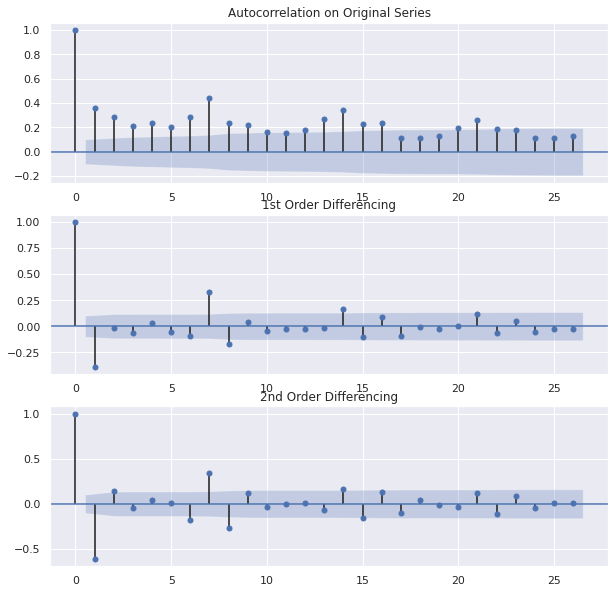

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
fig = plot_acf(data_arima, ax=ax1, title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(data_arima.diff().dropna(), ax=ax2, title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(data_arima.diff().diff().dropna(), ax=ax3, title="2nd Order Differencing")

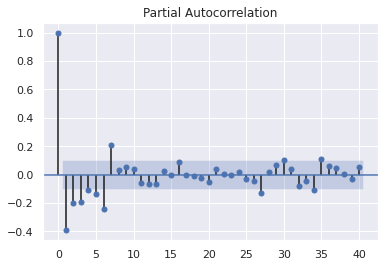

In [ ]:
plot_pacf(data_arima.diff().dropna(), lags=40) #knowing d=1 we apply diff() once
plt.show()

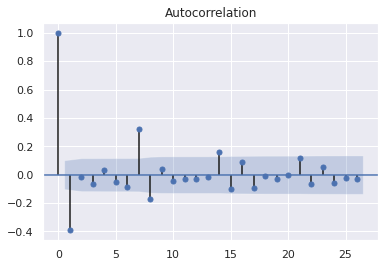

In [ ]:
plot_acf(data_arima.diff().dropna())
plt.show()

In [ ]:
model = ARIMA(data_arima, order=(1, 1, 1))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Quantity   No. Observations:                  373
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3900.131
Method:                       css-mle   S.D. of innovations           8387.938
Date:                Tue, 28 Jul 2020   AIC                           7808.263
Time:                        05:30:42   BIC                           7823.949
Sample:                    12-02-2010   HQIC                          7814.492
                         - 12-09-2011                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               46.1583     29.049      1.589      0.113     -10.777     103.093
ar.L1.D.Quantity     0.1609      0.060      2.665      0.008       0.043       0.279
ma.L1.D.Quantity    -0.9466 

In [ ]:
import warnings
import itertools
import operator
import statsmodels.api as sm
import statsmodels

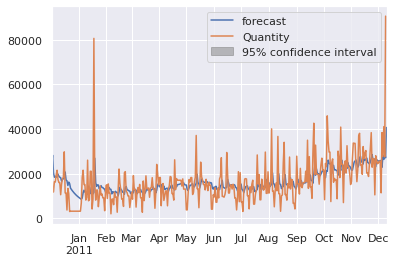

In [ ]:
graph = results.plot_predict(1, 374)
plt.show()

In [ ]:
def plotarima(n_periods, data_arima, results):
    # Forecast
    fc, confint = results.predict(n_periods, return_conf_int=True)
    # Weekly index
    fc_ind = pd.date_range(data_arima.index[data_arima.shape[0]-1], periods=n_periods, freq="W")
    # Forecast series
    fc_series = pd.Series(fc, index=fc_ind)
    # Upper and lower confidence bounds
    lower_series = pd.Series(confint[:, 0], index=fc_ind)
    upper_series = pd.Series(confint[:, 1], index=fc_ind)
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(data_arima)
    plt.plot(fc_series, color="red")
    plt.xlabel("date")
    plt.ylabel(data_arima.name)
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color="k", alpha=.25)
    plt.legend(("past", "forecast", "95% confidence interval"), loc="upper left")
    plt.show()

In [ ]:
plotarima(70, data_arima, results)

TypeError: ignored

In [ ]:
start_date = '2011-09-01'
pred = results.get_prediction(start=pd.to_datetime(start_date), dynamic=False)

AttributeError: ignored

In [ ]:
pred_ci = pred.conf_int()

In [ ]:
ax = data_arima['2011':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k',
               alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('quantity sold')

plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = data_arima[start_date:]

mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2))) 
from math import sqrt
print(sqrt(mse))

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime(start_date), dynamic=True)

pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
ax = data_arima['2011':].plot(label='observed')

pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=.7)

ax.fill_between(pred_dynamic_ci.index,
               pred_dynamic_ci.iloc[:, 0],
               pred_dynamic_ci.iloc[:, 1], color='k',
               alpha=.2)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(start_date), data_arima.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('quantity sold')

plt.legend()

plt.show()

In [ ]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = data_arima[start_date:]
mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
from math import sqrt
print(sqrt(mse))

In [ ]:
pred_uc = results.get_forecast(steps=365)

pred_ci = pred_uc.conf_int()

In [ ]:

ax = data_arima.plot(label='observed', figsize=(15,10))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1],
               color='k',
               alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('quantity sold')

plt.legend()
plt.show()